In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/giasmp/GiaSmp.csv


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('/kaggle/input/giasmp/GiaSmp.csv', encoding = 'ISO-8859-1')
df.head(10)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,2/1/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,3/1/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,4/1/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,5/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,6/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,7/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,8/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,9/1/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,10/1/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [4]:
df1 = pd.concat([df["Ngày"], df["4"], df['5']], axis=1)
df1.head(10)

,Ngày,4,5
0,1/1/2021,964.4,964.4
1,2/1/2021,1019.7,1019.7
2,3/1/2021,988.4,988.4
3,4/1/2021,1002.0,1002.0
4,5/1/2021,1061.5,1061.5
5,6/1/2021,1061.5,1061.5
6,7/1/2021,1061.5,1061.5
7,8/1/2021,1061.5,1061.5
8,9/1/2021,1064.1,1064.1
9,10/1/2021,966.7,966.7


In [5]:
ts = df1.drop(['Ngày','5'], axis = 1)
ts.head()

,4
0,964.4
1,1019.7
2,988.4
3,1002.0
4,1061.5


mean squared error:  3498.9409978209064


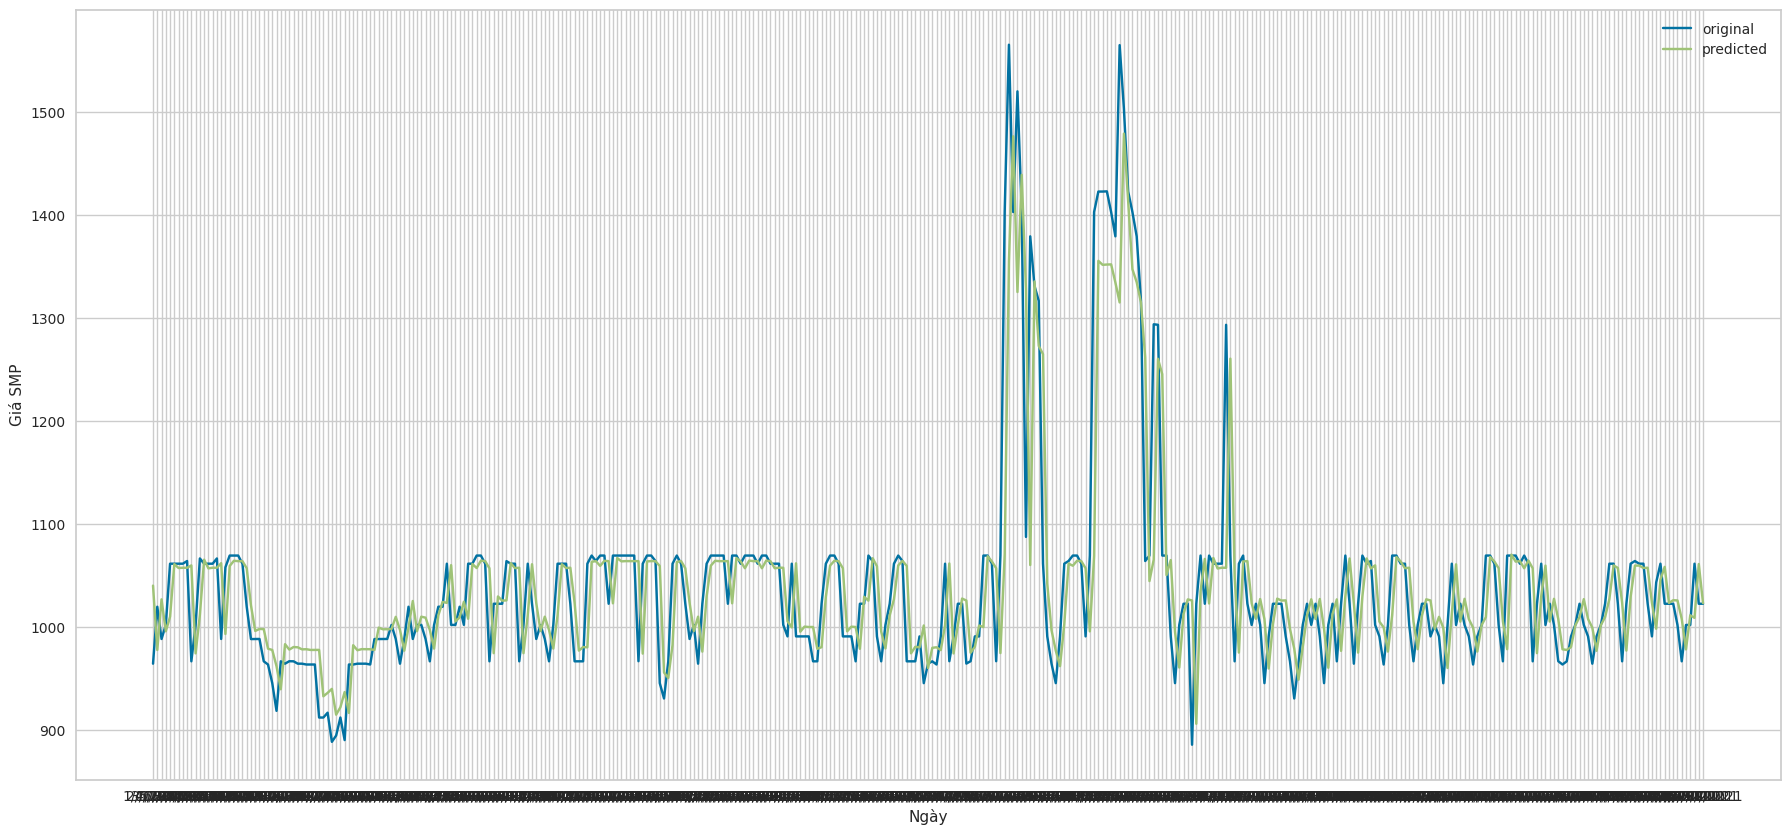

In [6]:
from sklearn.metrics import mean_squared_error
# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()
forecast = model_fit.predict()
mse = mean_squared_error(ts, forecast)
print("mean squared error: " ,mse)
# visualization
plt.figure(figsize=(22,10))
plt.plot(df1['Ngày'],df1['4'],label = "original")
plt.plot(forecast,label = "predicted")
plt.xlabel("Ngày")
plt.ylabel("Giá SMP")
plt.legend()
plt.savefig('graph.png')

plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

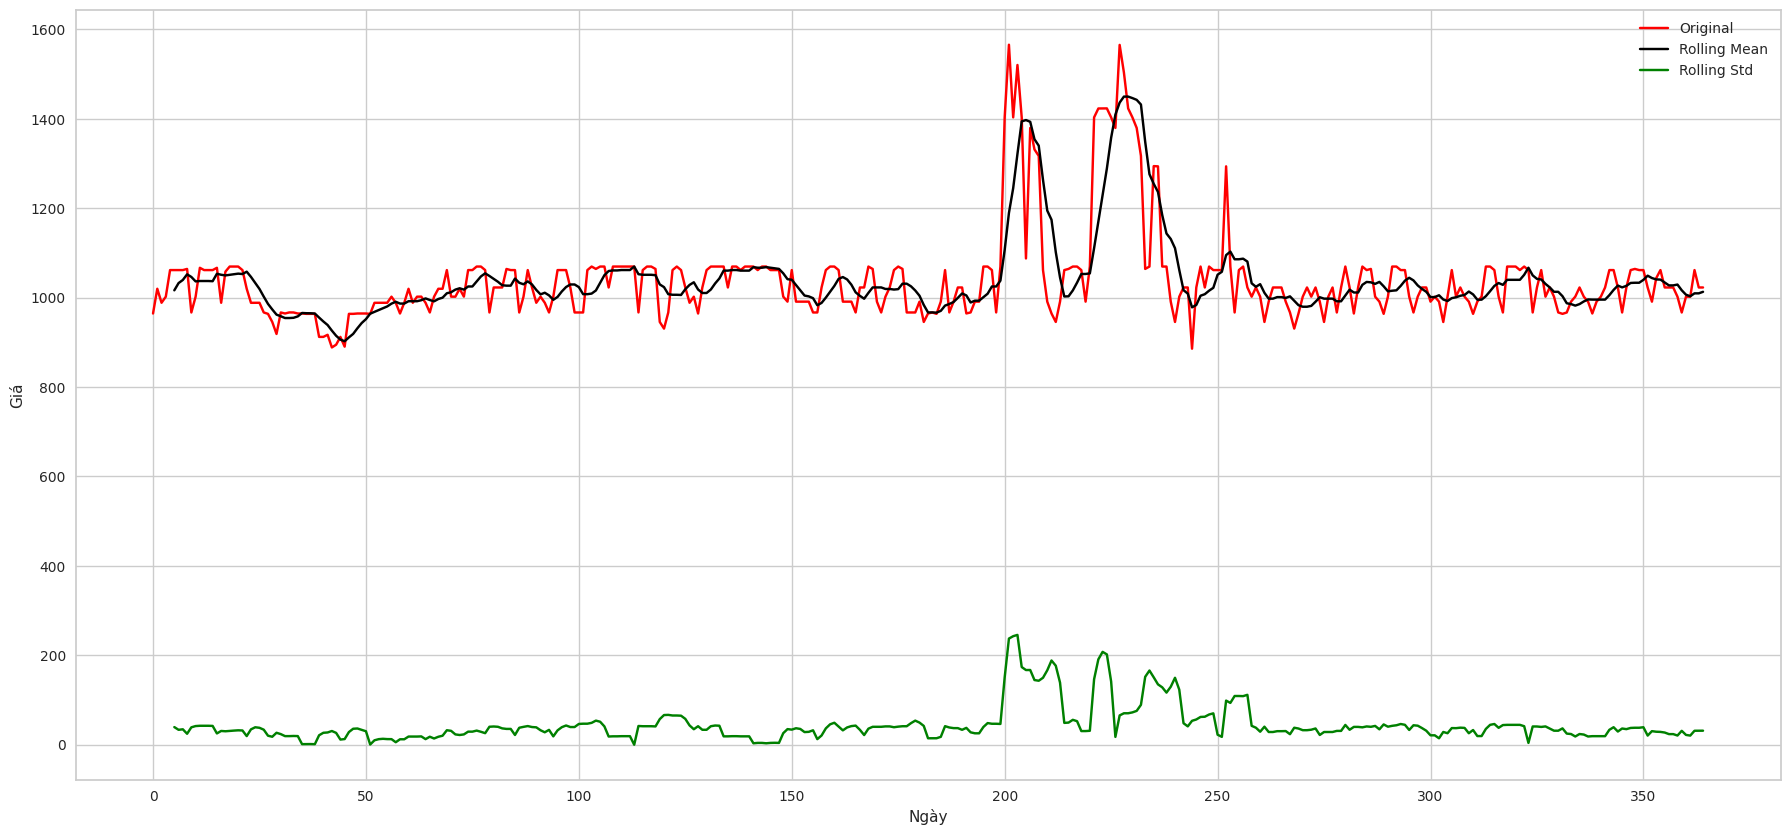

Test statistic:  -2.7846580195922055
p-value:  0.06049889940422125
Critical Values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}


In [8]:
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Ngày")
    plt.ylabel("Giá")
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts['4'])